## Desafío - Regresión desde la econometría

*Grupo "por Confirmar": @Vero, @hugopriest, @Ale*

### Contexto
En este desafío trabajaremos con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv Credit contiene las siguientes variables:
- Income : Ingreso anual disponible en miles de dólares.
- Limit : Límite del crédito.
- Rating : Ranking del crédito.
- Cards : Cantidad de tarjetas de credito.
- Age : Edad del usuario.
- Education : Años de educación del usuario.
- Gender : ¿Hombre o mujer?
- Student : ¿Es estudiante?
- Married : ¿Está casado?
- Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
- Balance : Promedio de deuda en tarjeta de crédito de usuario.

Para efectos prácticos del desafío, nos interesa saber sobre los determinantes de la variación en el promedio de deuda en tarjeta de crédito.
A lo largo del desafío generaremos modelos econométricos para inspeccionar los efectos de distintos atributos.

### Desafío 1: Prepare el ambiente de trabajo

- Importe las librerías básicas para el análisis de datos.
- Incluya los import base de *statsmodels*
- Importe la base de datos *Credit.csv* y elimine la columna *Unnamed: 0*.
- Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de *Ethnicity* , genere binarias para *AfricanAmerican* y *Asian* .
  - tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('Credit.csv').drop('Unnamed: 0', axis=1)
df.sample()

Income  Limit  Rating  Cards  Age  Education Gender Student Married  \
377  28.144   1567     142      3   51         10   Male      No     Yes   

     Ethnicity  Balance  
377  Caucasian        0

In [3]:
# Binarizar variables categóricas; la que tenga menos es 1, la otra es 0
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [4]:
df['bin_gender'] = np.where(df['Gender'].str.strip() == "Male", 1, 0) #Si es hombre, 1; si no, 0, 
                                                                    #"str.strip()" para que no considere espacios al comparar!

In [5]:
df['bin_student'] = np.where(df['Student'] == "Yes", 1, 0) #Si es estudiante, 1; si no, 0

In [6]:
df['bin_married'] = np.where(df['Married'] == "No", 1, 0) #Si no está casado, 1; si está, 0

In [7]:
df['bin_AfrAmer'] = np.where(df['Ethnicity'] == "African American", 1, 0) #Si es Afroamericano, 1; si no, 0

In [8]:
df['bin_Asian'] = np.where(df['Ethnicity'] == "Asian", 1, 0) #Si es Afroamericano, 1; si no, 0

In [9]:
df.sample(10).T

76      272        219               319     110  \
Income          30.622  30.413     38.954             27.59  34.537   
Limit             3293    3690       5222              2586    3271   
Rating             251     299        370               229     250   
Cards                1       2          4                 5       3   
Age                 68      25         76                54      57   
Education           16      15         13                16      17   
Gender            Male  Female     Female              Male  Female   
Student            Yes     Yes         No                No      No   
Married             No      No         No               Yes     Yes   
Ethnicity    Caucasian   Asian  Caucasian  African American   Asian   
Balance            532     728        653                 0      47   
bin_gender           1       0          0                 1       0   
bin_student          1       1          0                 0       0   
bin_married          1       1          1                 0       0   
bin_AfrAmer          0       0          0                 1       0   
bin_Asian            0       1          0                 0       1   

                          163               135        374        334     242  
Income                 13.676            44.473       29.4      24.23  20.918  
Limit                    2330              3500       4840       4756    1233  
Rating                    203               257        368        351     128  
Cards                       5                 3          3          2       3  
Age                        80                81         76         64      47  
Education                  16                16         18         15      18  
Gender                 Female            Female     Female     Female  Female  
Student                    No                No         No         No     Yes  
Married                    No                No        Yes        Yes     Yes  
Ethnicity    African American  African American  Caucasian  Caucasian   Asian  
Balance                     0                 8        588        594      16  
bin_gender                  0                 0          0          0       0  
bin_student                 0                 0          0          0       1  
bin_married                 1                 1          0          0       0  
bin_AfrAmer                 1                 1          0          0       0  
bin_Asian                   0                 0          0          0       1

 .

### Desafío 2: Genere gráficos descriptivos para las variables contínuas

Genere una función llamada *plot_hist* que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una leyenda para indicar qué representa cada línea.

In [52]:
def plot_hist(dataframe, variable):
    df_var = dataframe[variable].dropna()
    
    #Generar Histogramas
    mean = df_var.mean()
    mean_col = 'orangered'
    median = df_var.median()
    median_col = 'maroon'
    
    plt.title(variable, weight=800, fontsize='xx-large')
    plt.hist(df_var, alpha=.6, color='darksalmon')
    plt.hist(1, color=mean_col, label = 'mean')
    plt.hist(1, color=median_col, label = 'median')
    plt.legend(prop={'size': 10})
    
    plt.axvline(mean, color=mean_col, linestyle='--')
    plt.text(mean*1.1, 20,  "µ: "+str(round(mean,3)),  color=mean_col)
    
    plt.axvline(median, color=median_col )
    plt.text(median*1.1, 40,  "Me: "+str(round(median,3)), color=median_col)
    

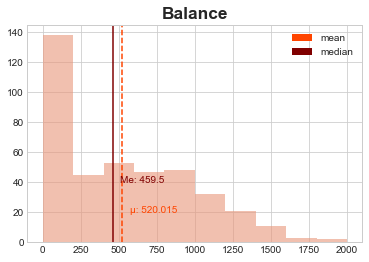

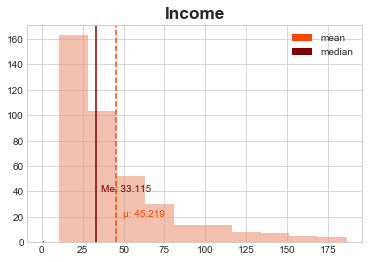

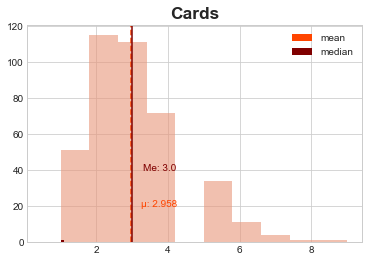

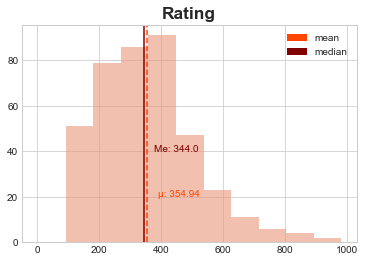

In [53]:
# ¿Cuál es el comportamiento de *Balance* , *Income* , *Cards* y *Rating* ?
variables = ['Balance', 'Income', 'Cards', 'Rating']

for i in variables:
    plt.figure()
    plot_hist(df, i)

#### ¿Cuál es el comportamiento de *Balance* , *Income* , *Cards* y *Rating* ?
'Ratings' y 'Cards' muestran valores muy similares de media y mediana sumamente similares, indicando una distribución geométrica de datos. En 'Balance' e 'Income' se observa ya una diferencia entre ambas.

 .

### Desafío 3: Regresión Lineal Simple
A continuación generaremos una serie de modelos simples (considere *Student*, *Income*, *Rating*)

Utilizando *statsmodels* , comente brevemente los siguientes puntos:
- ¿Qué variable presenta un mayor poder explicativo de la variabilidad de *Balance* ?
- ¿Qué podemos decir sobre el comportamiento de *Student* ?
- ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de *Balance* entre aquellos que son y no son estudiantes?

In [55]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [56]:
# Con mínimos cuadrados
model_b_s = smf.ols('Balance ~ Student', df)
fitted_b_s = model_b_s.fit()
fitted_b_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           1.49e-07
Time:                        00:47:04   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Con mínimos cuadrados
model_b_i = smf.ols('Balance ~ Income', df)
fitted_b_i = model_b_i.fit()
fitted_b_i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           1.03e-22
Time:                        00:47:04   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Con mínimos cuadrados
model_b_r = smf.ols('Balance ~ Rating', df)
fitted_b_r = model_b_r.fit()
fitted_b_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Wed, 03 Jul 2019   Prob (F-statistic):          1.90e-120
Time:                        00:47:16   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
- La variable *Rating*, con un R-squared = 0.745 tendría el mayor poder explicativo

#### ¿Qué podemos decir sobre el comportamiento de Student ?
- La variable *Student*, con un Prob (F-statistic) = 1.49e-07 es la que presenta menor variabilidad, lo que tiene sentido, al ser una variable categórica (al contrario de *Income* y *Rating*, que son continuas). También, con un R-squared = 0.067 (muy pequeño), tiene muy poco poder predictivo para *Balance* (hay una gran varianza en *Balance* que *Student* no puede explicar)

In [61]:
# Aplicando prueba de hipótesis, considerando los que son o no estudiantes
Y = df['Balance'].values
X = df['bin_student'].values  #Ya está binarizado! también sirve X = df.Student.map({'No':0, 'Yes':1}).values
X = sm.add_constant(X)
model2 = sm.OLS(Y,X)
fitted_model2 = model2.fit()

In [62]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           1.49e-07
Time:                        00:48:00   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        480.3694     23.434     20.499      0.000     434.300     526.439
x1           396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de *Balance* entre aquellos que son y no son estudiantes?
El resultado que se obtiene es el mismo, porque la variable ya estaba "binarizada" en "Yes" y "No", lo único que hicimos fue cambiarlo a "1" y "0"

.

### Desafío 4: Genere un modelo que incluya todos los regresores
Comente brevemente sobre el poder explicativo en la varianza de *y* las principales características de los predictores.

In [65]:
modelo_regresores = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + \
                             bin_gender + bin_student + bin_married + bin_AfrAmer + bin_Asian', df).fit()
modelo_regresores.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 03 Jul 2019   Prob (F-statistic):          1.11e-253
Time:                        00:54:30   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -488.2880     34.816    -14.025      0.000    -556.740    -419.836
Income         -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit           0.1909      0.033      5.824      0.000       0.126       0.255
Rating          1.1365      0.491      2.315      0.021       0.171       2.102
Cards          17.7245      4.341      4.083      0.000       9.190      26.259
Age            -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education      -1.0989      1.598     -0.688      0.492      -4.241       2.043
bin_gender     10.6532      9.914      1.075      0.283      -8.839      30.145
bin_student   425.7474     16.723     25.459      0.000     392.869     458.626
bin_married     8.5339     10.363      0.824      0.411     -11.841      28.908
bin_AfrAmer   -10.1070     12.210     -0.828      0.408     -34.113      13.899
bin_Asian       6.6972     12.122      0.552      0.581     -17.137      30.531
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Comente
La utilización de todos los regresores aumentó notoriamente el resultado de R-squared, mejorado el poder explicativo sobre *Balance*. Sin embargo, aumentó también notoriamente 'Prob (F-statistic)', indicando mayor variabilidad. También se observa que varias variables muestran p-value > 0.025, indicando presencia de variables que no son significativas y es conveniente dejar fuera del análisis antes de continuar

.

### Desafío 5: Depure el modelo e incluya sólo los predictores significativo
- En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia p-value ≤0.025.

In [ ]:
modelo_reg_depurado = smf.ols('Balance ~ Income + Limit + Rating + Cards + bin_student', df).fit()
modelo_reg_depurado.summary()

#### Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores. ¿Mejoró o empeoró el modelo con la reducción de regresores?
Al limitarlo sólo a las 5 variables con p-value ≤ 0.025, el R-squared se mantiene, mostrando la poca influencia que tenían las demás variables sobre 'Balance'. Tiene sentido considerando que las variables 'Income' (ingreso), 'Limit' (límite de crédito), 'Rating' (Ranking de crédito), 'Cards' (n° de tarjetas) y 'Student' (si es estudiante) justamente indican la capacidad de crédito de una persona, y por tanto, su 'Balance' (promedio de deuda)

.

### Desafío 6:
- Utilizando *lmplot* de *seaborn* , inspeccione el comportamiento de los tres principales determinantes.

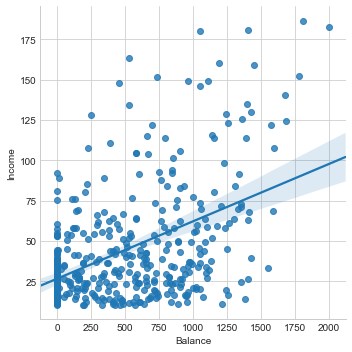

In [98]:
determinantes = ['Income', 'Limit', 'Rating']

sns.lmplot(x='Balance', y=determinantes[0], data=df)

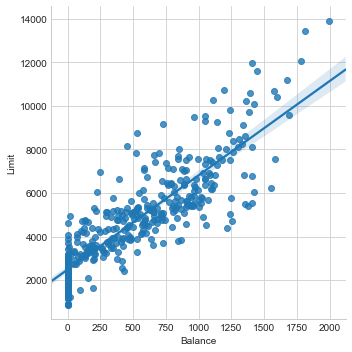

In [99]:
sns.lmplot(x='Balance', y=determinantes[1], data=df)

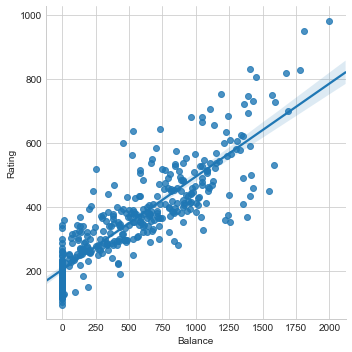

In [100]:
sns.lmplot(x='Balance', y=determinantes[2], data=df)